<a href="https://colab.research.google.com/github/vpagonis/CRCbook/blob/main/Chapter_12_Analysis_of_Nonlinear_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 12 - Analysis of Nonlinear Systems

This notebook contains the code for the example problems found in Chapter 12.

**Example 12.1: Damped Harmonic Oscillator - revisited**

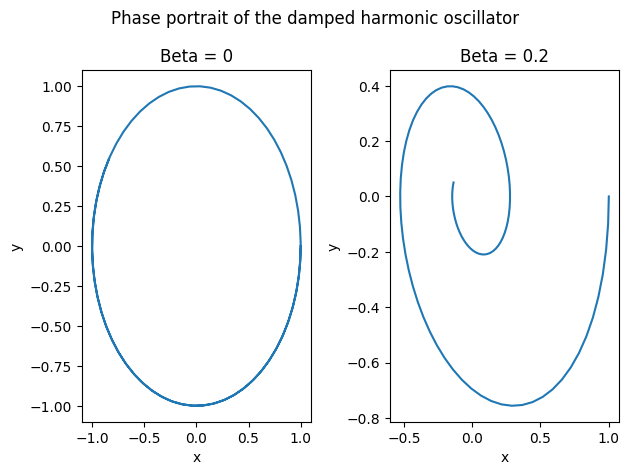

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dho(y, t, beta, omega):
    x, v = y
    dydt = [v, -2*beta*v - omega*x]
    return dydt

y0 = [1,0]
t = np.linspace(0,10,100)

sol0 = odeint(dho, y0, t, args = (0,1))
sol0_2 = odeint(dho, y0, t, args = (0.2,1))

fig, ax = plt.subplots(nrows = 1, ncols = 2)

ax[0].plot(sol0[:,0], sol0[:,1])
ax[0].set_title('Beta = 0')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(sol0_2[:,0], sol0_2[:,1])
ax[1].set_title('Beta = 0.2')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

fig.suptitle('Phase portrait of the damped harmonic oscillator')
fig.tight_layout()

plt.show()



**Example 12.2: Predator-prey models**

In [2]:
%reset -f

from sympy import solve
from sympy.abc import H,P, r, m, a, b

fps = solve((r*H-a*H*P, -m*P+b*H*P),(H,P))

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The fixed points are: ', fps)

---------------------------- CODE OUTPUT ----------------------------- 

The fixed points are:  [(0, 0), (m/b, r/a)]


**Example 12.3: Stability of the damped harmonic oscillator**

In [3]:
%reset -f

from sympy import diff, Matrix, symbols

x, v, beta, omega = symbols('x, v, beta, omega')

f = v
g = -beta * v - omega**2 * x

A = Matrix([[diff(f,x),diff(f,v)],[diff(g,x),diff(g,v)]])\
    .subs([(x,0),(v,0)])

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The eigenvalues with beta = 0 are:')
print((A.subs([(beta,0),(omega,1)])).eigenvals())

print('\nThe eigenvalues with beta = 0.2 are:')
print((A.subs([(beta,0.2),(omega,1)])).eigenvals())

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues with beta = 0 are:
{-I: 1, I: 1}

The eigenvalues with beta = 0.2 are:
{-0.1 - 0.99498743710662*I: 1, -0.1 + 0.99498743710662*I: 1}


**Example 12.4: Stability and the Lotka-Volterra equations**

In [4]:
%reset -f

from sympy import diff, Matrix, symbols, solve

r, a, m, b, H, P = symbols('r, a, m, b, H, P')

f = r*H-a*H*P
g = -m*P+b*H*P

fps_1 = [0,0]
fps_2 = [m/b, r/a]

A_1 = Matrix([[diff(f,H),diff(f,P)],[diff(g,H),diff(g,P)]]) \
    .subs([(H,fps_1[0]),(P,fps_1[1])])

A_2 = Matrix([[diff(f,H),diff(f,P)],[diff(g,H),diff(g,P)]]) \
    .subs([(H,fps_2[0]),(P,fps_2[1])])

print('-'*28,'CODE OUTPUT','-'*29,'\n')

print('The eigenvalues of the origin are:')
print(A_1.eigenvals())

print('\nThe eigenvalues of (m/b, r/a) are:')
print(A_2.eigenvals())

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues of the origin are:
{r: 1, -m: 1}

The eigenvalues of (m/b, r/a) are:
{-sqrt(-m*r): 1, sqrt(-m*r): 1}


**Example 12.5: SIS model of disease**

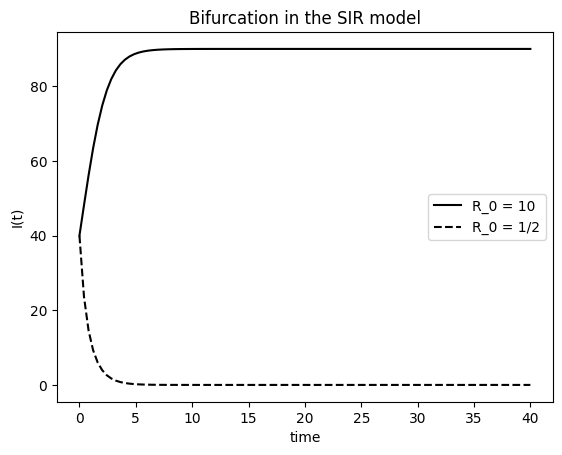

In [5]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

N = 100
I_0 = 40
t = np.linspace(0,40,100)

mu = 0.1
beta = 1.0
alpha = beta - mu
I_star =(1 - mu/beta)*N
I_1 = I_star/I_0 - 1

I_r_greater = I_star/(1 + I_1*np.exp(-alpha*t))

mu = 2.0
beta = 1.0
alpha = beta - mu
I_star =(1 - mu/beta)*N
I_1 = I_star/I_0 - 1

I_r_less = I_star/(1 + I_1*np.exp(-alpha*t))

plt.plot(t,I_r_greater, c = 'k', label = 'R_0 = 10')
plt.plot(t,I_r_less, c = 'k', linestyle='dashed', label = 'R_0 = 1/2')
plt.ylabel('I(t)')
plt.xlabel('time')
plt.title('Bifurcation in the SIR model')
plt.legend()
plt.show()

**Example 12.6: Competition model**

In [6]:
%reset -f

from sympy import symbols, solve

x, y = symbols('x,y')

f = x*(2 - x - 2*y)
g = 3*y*(2 - 2*x - y)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
solve((f,g),(x,y))

---------------------------- CODE OUTPUT ----------------------------- 



[(0, 0), (0, 2), (2/3, 2/3), (2, 0)]

In [7]:
from sympy import Matrix, diff

x0, y0 = [0,0]
x1, y1 = [0,2]
x2, y2 = [2,0]
x3, y3 = [2/3,2/3]

def JacEval(f,g, x_p, y_p):
    A = Matrix([[diff(f,x),diff(f,y)],[diff(g,x),diff(g,y)]])\
		.subs([(x,x_p),(y,y_p)])
    return list(A.eigenvals().keys())

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvalues of (0,0) are: ', JacEval(f,g,x0,y0))
print('The eigenvalues of (0,2) are: ', JacEval(f,g,x1,y1))
print('The eigenvalues of (2,0) are: ', JacEval(f,g,x2,y2))
print('The eigenvalues of (2/3,2/3) are: ', JacEval(f,g,x3,y3))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues of (0,0) are:  [2, 6]
The eigenvalues of (0,2) are:  [-2, -6]
The eigenvalues of (2,0) are:  [-6, -2]
The eigenvalues of (2/3,2/3) are:  [1.07036751697599, -3.73703418364266]


In [8]:
import numpy as np
J = np.array([[-2/3,-4/3],[-4,-2]])
w, v = np.linalg.eig(J)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvalues of x_3 are: ', w)
print('The eigenvectors of x_3 are: ', np.transpose(v))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues of x_3 are:  [ 1.07036752 -3.73703418]
The eigenvectors of x_3 are:  [[ 0.60889368 -0.79325185]
 [ 0.3983218   0.91724574]]


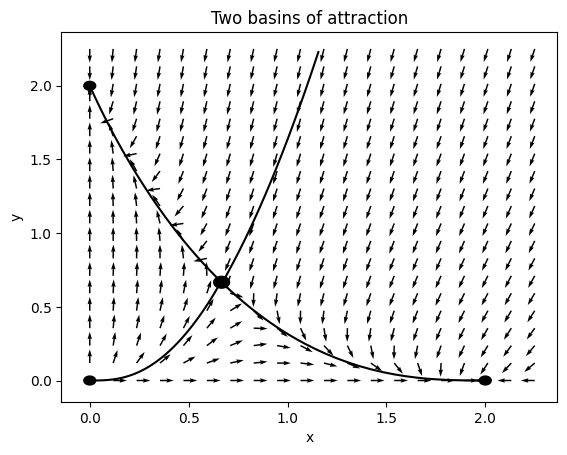

In [9]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
np.seterr(invalid='ignore')

def sys(vec, t):
    x, y = vec
    return [x*(2 - x - 2*y), 3*y*(2 - 2*x - y)]

#define times for integation
t_forward = np.linspace(0,100,1000)
t_backward_1 = np.linspace(0,-3,100)
t_backward_2 = np.linspace(0,-0.96,100)

#define initial conditions near saddle point
vec0 = [x3 + 0.01, y3 - 0.01 ]
vec1 = [x3 - 0.01, y3 + 0.01 ]
vec2 = [x3 - 0.01, y3 - 0.01]
vec3 = [x3 + 0.01, y3 + 0.01]

#compute the stable and unstable manifolds
unstable_1 = odeint(sys, vec0, t_forward)
unstable_2 = odeint(sys, vec1, t_forward)
stable_1 = odeint(sys, vec2, t_backward_1)
stable_2 = odeint(sys, vec3, t_backward_2)

#create a normalized vector field
x_v, y_v = np.meshgrid(np.linspace(0,2.25,20),np.linspace(0,2.25,20))
f_vec =x_v*(2 - x_v - 2*y_v)
g_vec = 3*y_v*(2 - 2*x_v - y_v)
r = (f_vec**2 + g_vec**2)**(0.5) #normalizes vectors

#create plot of phase portrait
fp0 = plt.Circle((x0,y0), 0.03, color='k')
fp1 = plt.Circle((x1,y1), 0.03, color='k')
fp2 = plt.Circle((x2,y2), 0.03, color='k')
fp3 = plt.Circle((x3,y3), 0.04, color='k')

fig, ax = plt.subplots()
ax.plot(unstable_1[:,0],unstable_1[:,1], 'k')
ax.plot(unstable_2[:,0],unstable_2[:,1], 'k')
ax.plot(stable_1[:,0],stable_1[:,1], 'k')
ax.plot(stable_2[:,0],stable_2[:,1], 'k')
ax.quiver(x_v,y_v,f_vec/r, g_vec/r)
ax.add_patch(fp0)
ax.add_patch(fp1)
ax.add_patch(fp2)
ax.add_patch(fp3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Two basins of attraction')
plt.show()

**Example 12.7: The double-well potential**

In [10]:
%reset -f

from sympy import Matrix, diff, symbols

x, y = symbols('x, y')

f, g = y, x-x**3

x0, y0 = [0,0]
x1, y1 = [1,0]
x2, y2 = [-1,0]

def JacEval(f,g, x_p, y_p):
    A = Matrix([[diff(f,x),diff(f,y)],[diff(g,x),diff(g,y)]])\
        .subs([(x,x_p),(y,y_p)])
    return list(A.eigenvals().keys())

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvalues of (0,0) are: ', JacEval(f,g,x0,y0))
print('The eigenvalues of (1,0) are: ', JacEval(f,g,x1,y1))
print('The eigenvalues of (0,-1) are: ', JacEval(f,g,x2,y2))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues of (0,0) are:  [-1, 1]
The eigenvalues of (1,0) are:  [-sqrt(2)*I, sqrt(2)*I]
The eigenvalues of (0,-1) are:  [-sqrt(2)*I, sqrt(2)*I]


In [11]:
import numpy as np
J = np.array([[0,1],[1,0]])
w, v = np.linalg.eig(J)

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('The eigenvalues of x_0 are: ', w)
print('The eigenvectors of x_0 are: ', np.transpose(v))

---------------------------- CODE OUTPUT ----------------------------- 

The eigenvalues of x_0 are:  [ 1. -1.]
The eigenvectors of x_0 are:  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


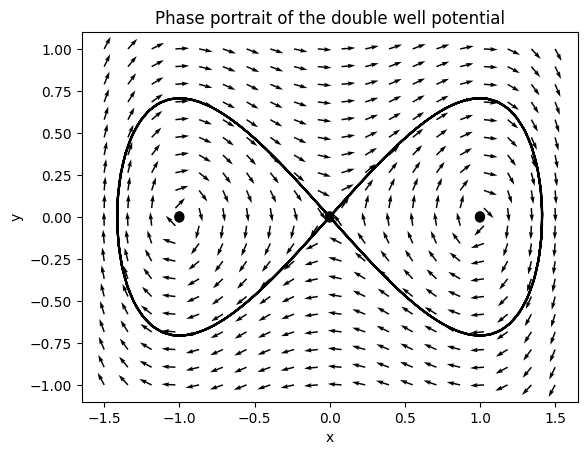

In [12]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
np.seterr(invalid='ignore')

import warnings
warnings.filterwarnings("ignore")

def sys(vec, t):
    x, y = vec
    return [y, x - x**3]

t_forward = np.linspace(0,100,1000)

vec0 = [x0 + 0.01, y0 + 0.01 ]
vec1 = [x0 - 0.01, y0 - 0.01 ]

unstable_1 = odeint(sys, vec0, t_forward)
unstable_2 = odeint(sys, vec1, t_forward)


x_v, y_v = np.meshgrid(np.linspace(-1.5,1.5,20),np.linspace(-1,1,20))
f_vec = y_v
g_vec = x_v - x_v**3
r = (f_vec**2 + g_vec**2)**(0.5) #normalizes vectors

fp0 = plt.Circle((x0,y0), 0.03, color='k')
fp1 = plt.Circle((x1,y1), 0.03, color='k')
fp2 = plt.Circle((x2,y2), 0.03, color='k')

fig, ax = plt.subplots()
ax.plot(unstable_1[:,0],unstable_1[:,1], 'k')
ax.plot(unstable_2[:,0],unstable_2[:,1], 'k')
ax.quiver(x_v,y_v,f_vec/r, g_vec/r)
ax.add_patch(fp0)
ax.add_patch(fp1)
ax.add_patch(fp2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase portrait of the double well potential')
plt.show()

**Example 12.8: The Duffing equation**

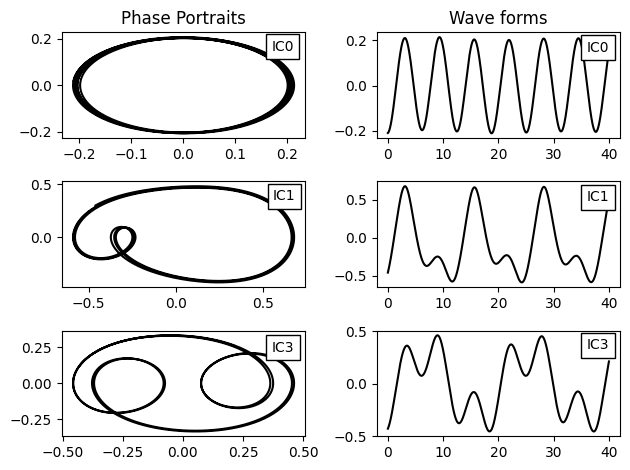

In [13]:
%reset -f

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

beta, omega, delta, B, alpha = 0, 1.0, 0.08, 0.2, 1.0

def sys(vec, t):
    x, y = vec
    return [y,-delta*y - beta*x - alpha*x**3 + B*np.cos(omega*t)]

t_forward = np.linspace(0,40,1000)

vec0 = [-0.21, 0.02]
vec1 = [-0.46, 0.3 ]
vec2 = [-0.43, 0.12]

ic0 = odeint(sys, vec0, t_forward)
ic1 = odeint(sys, vec1, t_forward)
ic2 = odeint(sys, vec2, t_forward)

fig, ax = plt.subplots(3,2)
ax[0,0].plot(ic0[:,0],ic0[:,1], 'k')
ax[0,0].set_title('Phase Portraits')
ax[0,0].text(0.17,0.15, 'IC0',bbox={'facecolor':'white'})
ax[0,1].plot(t_forward,ic0[:,0], 'k')
ax[0,1].text(36,0.15, 'IC0',bbox={'facecolor':'white'})
ax[0,1].set_title('Wave forms')
ax[1,0].plot(ic1[:,0],ic1[:,1], 'k')
ax[1,0].text(0.56,0.35, 'IC1',bbox={'facecolor':'white'})
ax[1,1].plot(t_forward,ic1[:,0], 'k')
ax[1,1].text(36,0.48, 'IC1',bbox={'facecolor':'white'})
ax[2,0].plot(ic2[:,0],ic2[:,1], 'k')
ax[2,0].text(0.37,0.22, 'IC3',bbox={'facecolor':'white'})
ax[2,1].plot(t_forward,ic2[:,0], 'k')
ax[2,1].text(36,0.33, 'IC3',bbox={'facecolor':'white'})
fig.tight_layout()
plt.show()

**Example 12.9: The phase portrait of the Lorenz equations**

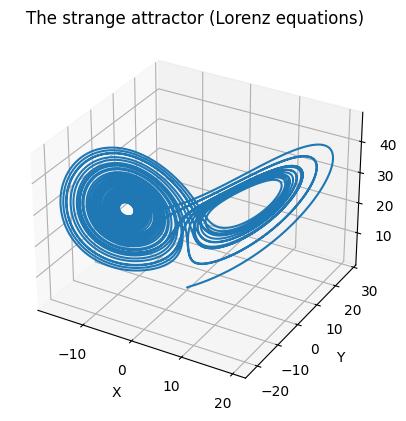

In [14]:
%reset -f

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

sigma, r, b = 10, 28, 8/3

def sys(vec, t):
    x, y, z = vec
    return [sigma*(y-x), r*x-y-x*z,x*y-b*z]

t = np.linspace(0,40,10000)

vec0 = [0.1,0,0.1]

soln = odeint(sys,vec0,t)

xs,ys,zs = soln.T

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(xs, ys, zs)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title('The strange attractor (Lorenz equations)')
plt.show()


**Example 12.10: Trajectories on the butterfly attractor**

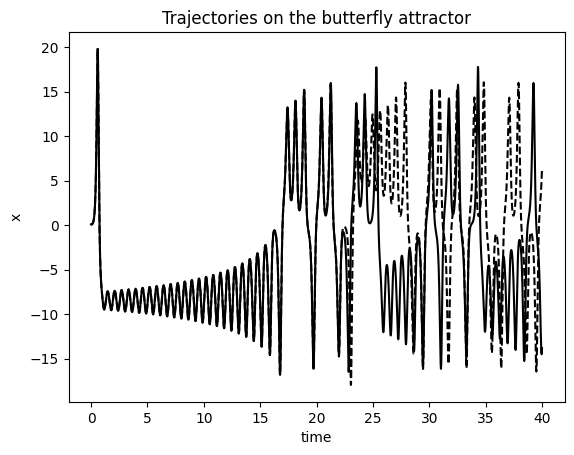

In [15]:
%reset -f

from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

sigma, r, b = 10, 28, 8/3

def sys(vec, t):
    x, y, z = vec
    return [sigma*(y-x), r*x-y-x*z,x*y-b*z]

t = np.linspace(0,40,10000)

vec0 = [0.1,0,0.1]
vec1 = [0.101,0,0.1]

soln0 = odeint(sys,vec0,t)
soln1 = odeint(sys,vec1,t)

x0 = soln0[:,0]
x1 = soln1[:,0]

plt.plot(t,x0, 'k')
plt.plot(t,x1,color='black', linestyle='dashed')
plt.ylabel('x')
plt.xlabel('time')
plt.title('Trajectories on the butterfly attractor')
plt.show()

**Example 12.11: The horizon time**

In [16]:
%reset -f

import numpy as np

def horizon_time(x):            #x = precision (initial error)
    a = 0.01                    #error tolerance
    lam = 1.5                   #maximal Lyapunov exponent
    t_h = np.log(a/x)/lam
    return t_h

t_h1 = horizon_time(10**(-3))
t_h2 = horizon_time(10**(-9))

print('-'*28,'CODE OUTPUT','-'*29,'\n')
print('When delta0 = 10^(-3), t_h =', t_h1)
print('When delta0 = 10^(-9), t_h =', t_h2)
print('Horizon time is increased by a factor of ', t_h2/t_h1)

---------------------------- CODE OUTPUT ----------------------------- 

When delta0 = 10^(-3), t_h = 1.5350567286626973
When delta0 = 10^(-9), t_h = 10.74539710063888
Horizon time is increased by a factor of  7.0
